In [60]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [61]:
# creating arrays that of latitudes and longitudes 
# pack the latitudes and longitudes as pairs by zipping them with the zip() fxn

# Create a set of random latitude and longitude combinations 
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [62]:
# zip memory above packs each pair of lats and lngs having the same index in their respective array into a tuple

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [63]:
# You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you
# unzip the latitudes and longitudes into the coordinates list before moving on

# display the coordinate pairs 
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

72.3256387726706 -174.3954450368458
-48.637217521470404 -151.95120939235625
-8.477408571034047 -117.59934043446789
-21.970439888789485 -159.1064655035991
48.0726541655267 76.7651330757912
22.48927786103677 -38.41377915492046
-10.88023873788292 -153.22398383429248
55.86686397685091 -112.26368059386047
-31.097684617764166 -51.54009060228543
-43.45962548799134 74.62130492763899
80.6379687720646 -0.30963319824485325
2.6887186275874058 -35.282007486512725
-44.45747359584448 11.876043093233335
-79.92537127713885 21.54435916103833
7.083258296847077 121.64034901656504
-36.08251655359401 36.83117634718792
-43.6718835488651 67.15695950975939
-11.45164420766919 -28.313942154446465
78.66703895886172 121.31616479731485
-43.90026746574278 -133.72556159169903
16.60654505508738 129.09940010231293
-78.95006565061384 -76.25228343492144
43.418981526068876 -19.473403461373664
-54.805790620828375 -171.5865772217243
45.86190753515325 69.0039296482073
25.147229716348235 -75.75657249371936
21.87765919851917 1

-40.8589336712902 164.0669495391491
29.38351695777122 177.99344160281277
5.540113922414349 138.19639898295884
-44.87572476101886 1.817352721084859
13.975033798865056 -78.92663041047993
40.561745588584586 40.36404791112676
26.114825653489646 84.26708942904315
3.1684157291966955 86.8408780366239
48.35600978532969 -19.24075733907867
55.449727377047054 -14.629623684416515
16.317878194401658 -45.16058581649713
50.38357511481854 151.88957640766023
-11.591073442557018 -31.950498329886358
-76.47464064613612 -13.439224519605176
27.530895401491406 -30.800018214994253
-59.46034851344717 -20.276350305866174
-87.131907395945 130.83139165062187
-45.52595586808215 -19.605898327004297
0.1460265204577098 178.65098007850457
33.15713440537158 86.30052632866955
79.9631083211363 -27.099052231786374
-67.2061309103371 84.039675687081
-19.91759298372844 58.87052713523647
-21.278408844466895 -120.80895429165469
-38.90296353393821 145.94658899966794
-17.0490823409462 -118.10588372846124
68.84889748102594 22.049

In [64]:
from citipy import citipy

In [65]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and long combination 
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list 
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count 
len(cities)

601

In [66]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [67]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea375d0306711e30293f0877525ad465


In [68]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [69]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list 
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city 
    city_url = url + "&q=" + cities[i]
print(city_url)

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record and set the numbers and the city 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record coun t 
    record_count += 1
    
    
# Run an APR request for each of the cities 
    try:
        # Parse the JSON and retrieve data 
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
# If an error is experienced, skip the city 
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea375d0306711e30293f0877525ad465&q=effium
Processing Record 1 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 13 | mataura
Processing Record 3 of Set 13 | atuona
Processing Record 4 of Set 13 | avarua
Processing Record 5 of Set 13 | karkaralinsk
City not found. Skipping...
Processing Record 6 of Set 13 | ponta do sol
Processing Record 7 of Set 13 | faanui
Processing Record 8 of Set 13 | athabasca
Processing Record 9 of Set 13 | camaqua
Processing Record 10 of Set 13 | mahebourg
Processing Record 11 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 13 | paracuru
Processing Record 13 of Set 13 | cape town
Processing Record 14 of Set 13 | bredasdorp
Processing Record 15 of Set 13 | labuan
Processing Record 16 of Set 13 | margate
Processing Record 17 of Set 13 | saint-philippe
Processing Record 18 of Set

Processing Record 30 of Set 16 | ayia marina
Processing Record 31 of Set 16 | fiditi
Processing Record 32 of Set 16 | sorland
Processing Record 33 of Set 16 | kahului
Processing Record 34 of Set 16 | prince rupert
Processing Record 35 of Set 16 | flinders
Processing Record 36 of Set 16 | palabuhanratu
City not found. Skipping...
Processing Record 37 of Set 16 | jalu
Processing Record 38 of Set 16 | kruisfontein
Processing Record 39 of Set 16 | labrea
Processing Record 40 of Set 16 | jumla
Processing Record 41 of Set 16 | sisimiut
Processing Record 42 of Set 16 | arzgir
Processing Record 43 of Set 16 | trinidad
Processing Record 44 of Set 16 | vestmannaeyjar
Processing Record 45 of Set 16 | rawson
Processing Record 46 of Set 16 | puerto rico
Processing Record 47 of Set 16 | mnogovershinnyy
Processing Record 48 of Set 16 | nishihara
Processing Record 49 of Set 16 | hualmay
Processing Record 50 of Set 16 | lithakia
Processing Record 1 of Set 17 | sao filipe
Processing Record 2 of Set 17 |

Processing Record 15 of Set 20 | thinadhoo
Processing Record 16 of Set 20 | khasan
Processing Record 17 of Set 20 | saldanha
Processing Record 18 of Set 20 | ginda
Processing Record 19 of Set 20 | saint-pierre
Processing Record 20 of Set 20 | chernyshevskiy
Processing Record 21 of Set 20 | vardo
Processing Record 22 of Set 20 | irbil
Processing Record 23 of Set 20 | antofagasta
Processing Record 24 of Set 20 | swellendam
Processing Record 25 of Set 20 | mimongo
Processing Record 26 of Set 20 | udachnyy
Processing Record 27 of Set 20 | ribeira grande
Processing Record 28 of Set 20 | dakar
Processing Record 29 of Set 20 | tazovskiy
Processing Record 30 of Set 20 | golubitskaya
Processing Record 31 of Set 20 | tromso
Processing Record 32 of Set 20 | kuche
City not found. Skipping...
Processing Record 33 of Set 20 | puerto leguizamo
Processing Record 34 of Set 20 | bathsheba
Processing Record 35 of Set 20 | xinzhi
Processing Record 36 of Set 20 | rodrigues alves
Processing Record 37 of Set

Processing Record 3 of Set 24 | belmonte
Processing Record 4 of Set 24 | lusambo
Processing Record 5 of Set 24 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 6 of Set 24 | olean
Processing Record 7 of Set 24 | shelburne
Processing Record 8 of Set 24 | erdenet
Processing Record 9 of Set 24 | alofi
Processing Record 10 of Set 24 | alberton
Processing Record 11 of Set 24 | paita
Processing Record 12 of Set 24 | tafresh
Processing Record 13 of Set 24 | mana
Processing Record 14 of Set 24 | rongcheng
Processing Record 15 of Set 24 | apache junction
Processing Record 16 of Set 24 | iquique
Processing Record 17 of Set 24 | xudat
Processing Record 18 of Set 24 | ous
Processing Record 19 of Set 24 | grajau
Processing Record 20 of Set 24 | cochabamba
Processing Record 21 of Set 24 | qui nhon
Processing Record 22 of Set 24 | olafsvik
Processing Record 23 of Set 24 | faya
Processing Record 24 of Set 24 | samarai
Processing Record 25 of Set 24 | alta floresta
Processing Record 26

In [70]:
len(city_data
   )

557

In [71]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,39.76,97,96,3.85,NZ,2022-07-31 05:58:13
1,Atuona,-9.8000,-139.0333,76.96,78,13,15.32,PF,2022-07-31 05:58:14
2,Avarua,-21.2078,-159.7750,75.25,73,40,13.80,CK,2022-07-31 05:58:15
3,Ponta Do Sol,32.6667,-17.1000,70.72,81,12,5.21,PT,2022-07-31 05:58:15
4,Faanui,-16.4833,-151.7500,79.18,72,1,23.60,PF,2022-07-31 05:58:16
5,Athabasca,54.7169,-113.2854,52.21,91,30,6.73,CA,2022-07-31 05:55:59
6,Camaqua,-30.8511,-51.8122,45.43,89,45,2.75,BR,2022-07-31 05:55:25
7,Mahebourg,-20.4081,57.7000,74.25,78,75,13.80,MU,2022-07-31 05:58:17
8,Paracuru,-3.4100,-39.0306,76.10,91,86,8.43,BR,2022-07-31 05:58:18
9,Cape Town,-33.9258,18.4232,55.38,84,20,2.30,ZA,2022-07-31 05:53:29


In [72]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = df[new_column_order]

In [73]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Korla,CN,2022-07-28 23:40:43,41.7597,86.1469,87.39,23,100,16.78
1,Minas,UY,2022-07-28 23:40:44,-34.3759,-55.2377,49.05,72,98,17.40
2,Yakeshi,CN,2022-07-28 23:40:44,49.2833,120.7333,68.27,74,86,2.24
3,Albany,US,2022-07-28 23:40:29,42.6001,-73.9662,81.34,68,74,3.00
4,Severo-Kurilsk,RU,2022-07-28 23:38:59,50.6789,156.1250,55.45,87,86,9.04


In [74]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [75]:
# Create a scatter plot for latitude vs maximum temp 

# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

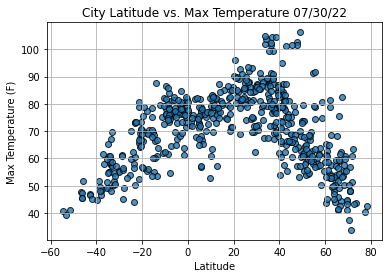

In [76]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

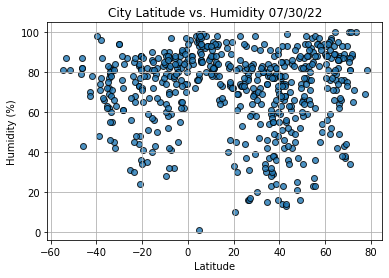

In [77]:
# Build the scatter plot for humidity vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

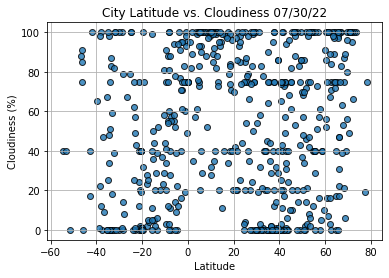

In [78]:
# Build the scatter plot for cloudiness vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

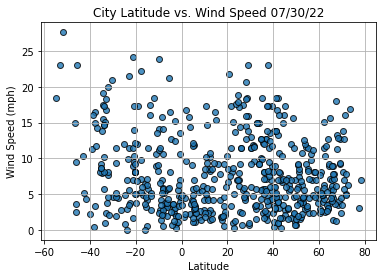

In [79]:
# Build the scatter plot for wind speed vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [80]:
# Import linregress
from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [81]:
# creating a new df from a current df, use loc method 
# loc method accesses a group of rows and columns in the current df by an index, labels or a Boolean array 
# output of below fxn will present all info at index 13 of the city data df 


index13 = city_data_df.loc[13]
index13

City                  Svetlogorsk
Country                        BY
Date          2022-07-28 23:40:50
Lat                       52.6333
Lng                       29.7333
Max Temp                    54.45
Humidity                       88
Cloudiness                     75
Wind Speed                   6.22
Name: 13, dtype: object

In [82]:
# can filter a df based on a value of the row 
# if we want to get all the northern hemisphere lats
# for lats greater than or equal to 0, we can filter the city_data_df 
# executing the code will return either True or False for all the rows that meet these criteria 


city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
559     True
560    False
561     True
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [83]:
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df
# Inside the brackets, we would add the conditional filter

city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Korla,CN,2022-07-28 23:40:43,41.7597,86.1469,87.39,23,100,16.78
2,Yakeshi,CN,2022-07-28 23:40:44,49.2833,120.7333,68.27,74,86,2.24
3,Albany,US,2022-07-28 23:40:29,42.6001,-73.9662,81.34,68,74,3.00
4,Severo-Kurilsk,RU,2022-07-28 23:38:59,50.6789,156.1250,55.45,87,86,9.04
5,Nikolskoye,RU,2022-07-28 23:40:46,59.7035,30.7861,58.80,89,91,3.74


In [84]:
# assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression
# We can take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0.


# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

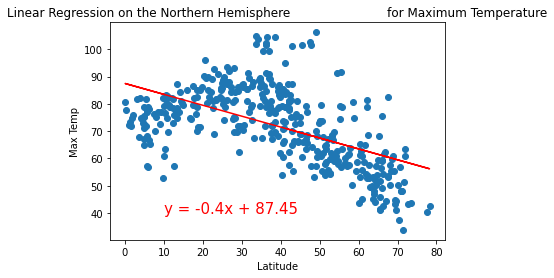

In [85]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

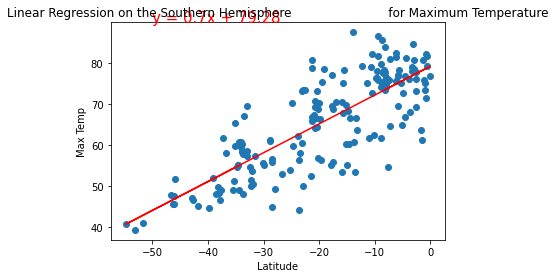

In [86]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [87]:
# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is 
# less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, 
# as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer.
# And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

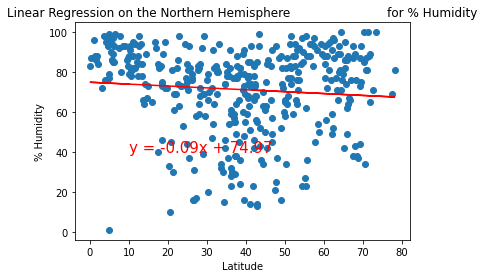

In [88]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10, 40))

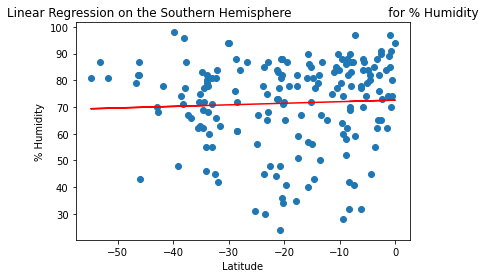

In [89]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [90]:
# The correlation 
# between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres 
# for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. 
# Check the r-values for your plots. 

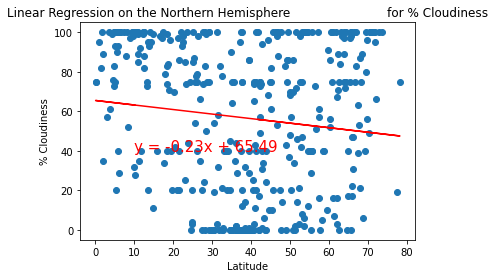

In [91]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10, 40))

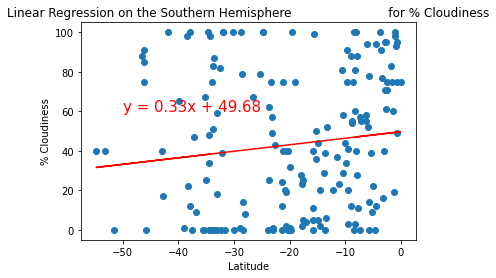

In [92]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [93]:
# r-value N. Hemi: -0.23 
# r-value S. Hemi: 0.33 

# Cloudiness is unpredicatable due to changing weather patterns that can increase or decrease percent cloudiness 

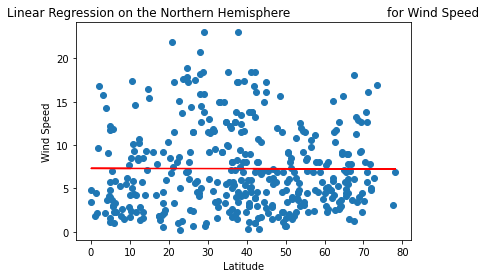

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

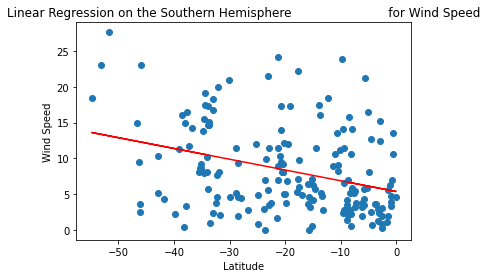

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))